# Подключение необходимых модулей

In [232]:
import pandas as pd   
import seaborn as sns    
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка набора данных

In [233]:
df = pd.read_csv("/Users/evgenijmihajlov/Downloads/athlete_events.csv")

# Обзор данных

In [234]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Размерность набора данных: 271116 наблюдений и 15 признаков.
В наборе данных присутствуют пропущенные значения.

In [236]:
# Проверка на пропущенные записи
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Пустые значения обнаружены в следующих признаках: **Height**, **Weight**, **Age**, **Medal**.

In [237]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Аномальные значения находятс в признаках Age, где максимальный возраст участника 97 лет, а так минимальный возраст равен 10, так же аномальное значение присутствует в признаки Weight -  максимальное значение 214, и в признаки Height присутствует аномальное значение 226 см.

# Предобработка данных

In [238]:
# Заменяем аномальные значения на возраста
df['Age'] = df['Age'].where(df['Age'] <= 40, 40)
df['Age'] = df['Age'].where(df['Age'] >= 16, 16)
# Заменяем аномальные значения на роста
df['Height'] = df['Height'].where(df['Height'] <= 210, 210)
df['Height'] = df['Height'].where(df['Height'] >= 140, 140)
# Заменяем аномальные значения на веса
df['Weight'] = df['Weight'].where(df['Weight'] <= 80, 80)
df['Weight'] = df['Weight'].where(df['Weight'] >= 40, 40)

In [239]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.856501,183.030459,71.040946,1978.378480
std,39022.286345,6.056507,17.121541,10.201607,29.877632
min,1.000000,16.000000,140.000000,40.000000,1896.000000
25%,34643.000000,22.000000,170.000000,63.000000,1960.000000
50%,68205.000000,25.000000,180.000000,75.000000,1988.000000
75%,102097.250000,29.000000,194.000000,80.000000,2002.000000
max,135571.000000,40.000000,210.000000,80.000000,2016.000000


Можем увидеть что теперь значения в норме.

In [240]:
df.describe(include="object").T

,count,unique,top,freq
Name,271116,134732,Robert Tait McKenzie,58
Sex,271116,2,M,196594
Team,271116,1184,United States,17847
NOC,271116,230,USA,18853
Games,271116,51,2000 Summer,13821
Season,271116,2,Summer,222552
City,271116,42,London,22426
Sport,271116,66,Athletics,38624
Event,271116,765,Football Men's Football,5733
Medal,39783,3,Gold,13372


In [241]:
# Замена пустых значений на популярные
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])
df['Weight'] = df['Weight'].fillna(df['Weight'].mode()[0])
df['Medal'] = df['Medal'].fillna("Нет")


In [242]:
# Проверка на пропущенные записи
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Все пустые значения в наборе данных были заполнены

In [243]:
df['Medal'].value_counts()

Medal
Нет       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [244]:
# Подсчет количество дубликатов
df.duplicated().sum()

1385

В наборе данных присутствует 1385 дубликатов.

In [245]:
# Удаляем дубликаты
df = df.drop_duplicates()


In [246]:
# Снова проверяем количество дубликатов в наборе данных
df.duplicated().sum()

0

# Разведочный анализ данных

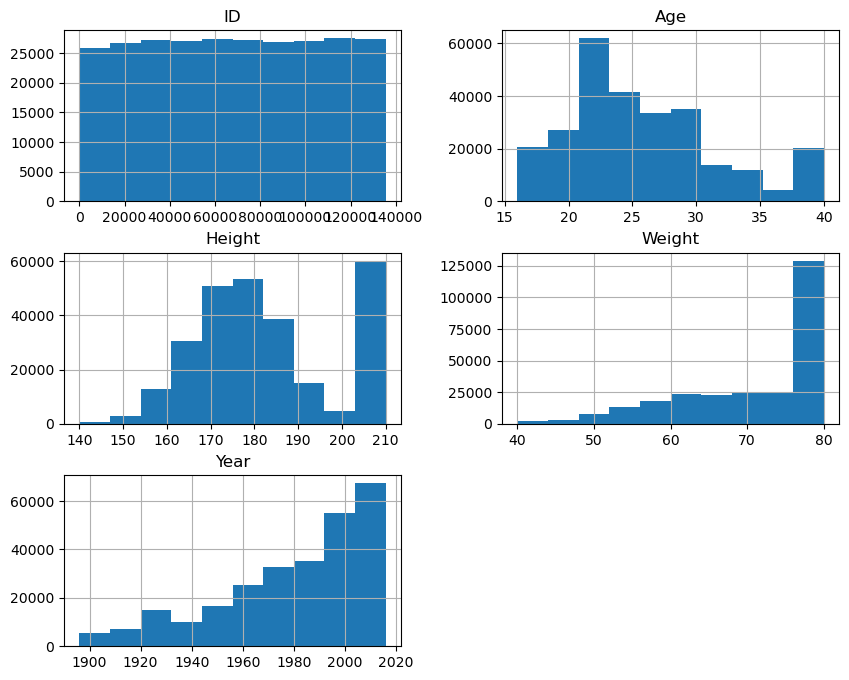

In [247]:
df.hist(figsize=(10,8), bins=10);

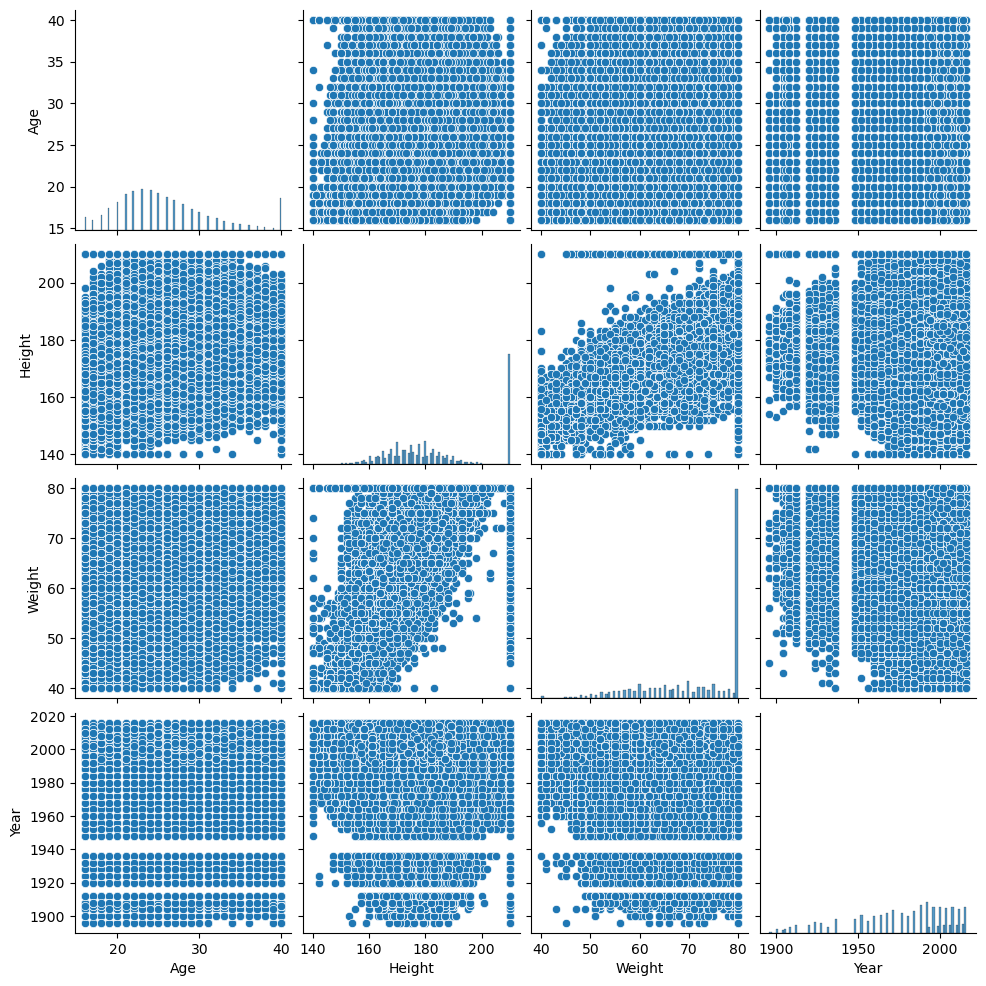

In [248]:
sns.pairplot(data=df[["Age", "Height", "Weight", "Year"]])

In [249]:
df[["Age", "Height", "Weight", "Year"]].corr()

,Age,Height,Weight,Year
Age,1.000000,0.249107,0.253110,-0.195330
Height,0.249107,1.000000,0.762918,-0.527934
Weight,0.253110,0.762918,1.000000,-0.327758
Year,-0.195330,-0.527934,-0.327758,1.000000


Можем наблюдать зависимость между признаком **Height** и признаком **Weight**

<Axes: >

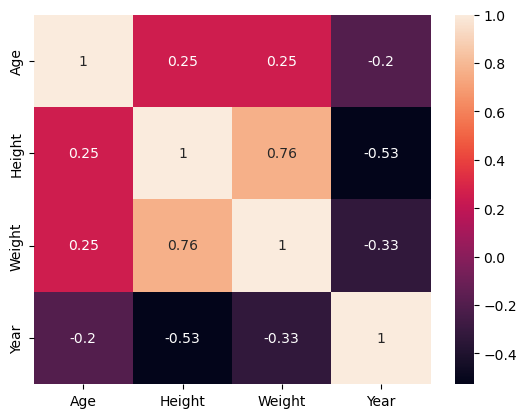

In [250]:
sns.heatmap(df[["Age", "Height", "Weight", "Year"]].corr(), annot=True)

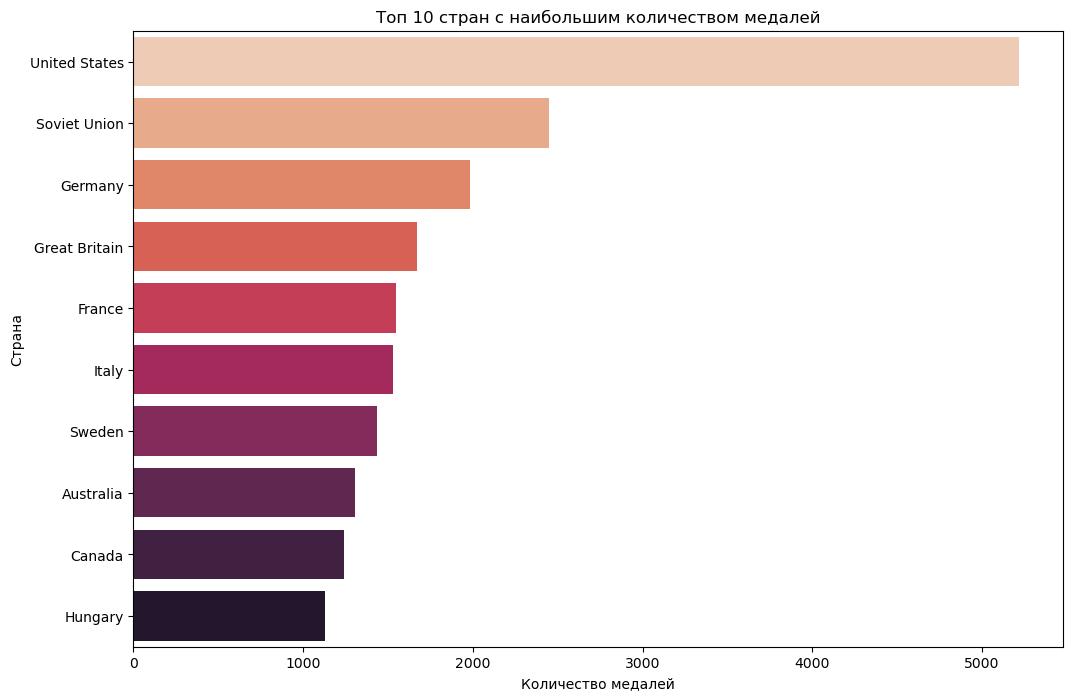

In [251]:
medal_data = df[df['Medal'] != "Нет"]
country_medal_counts = medal_data['Team'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=country_medal_counts.values, y=country_medal_counts.index, palette="rocket_r")
plt.title("Топ 10 стран с наибольшим количеством медалей")
plt.xlabel("Количество медалей")
plt.ylabel("Страна")
plt.show()

# Вывод
1. Был загружен набор данных. Первые наблюдения показали, что в наборе данных есть пропуски и аномальное значение Height, Weight, Age.
2. Проведена предобработка данных. Обработали пропущенные значения и аномальные значения.
3. Проведен разведочный анализ данных. Наблюдается небольшая зависимость между признаками Height и Weight.